# Capítulo 12


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import t
import math

## Ejercicio 3

### Cálculo del intervalo de confianza en la distribución normal

In [5]:
media = 24
var= 4
intervalo = stats.norm.interval(confidence=0.95, loc= media, scale= var/
                               np.sqrt(15)) # se divide la varianza por la raíz cuadrada N

dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val, 2)}')

Límite inferior: 21.98
Límite superior: 26.02


### Cálculo del intervalo de confianza en la distribución t

a) Forma I

In [31]:
intervalo = stats.t.interval(confidence= 0.95, df= 14, loc=media, scale=var/math.sqrt(14)) # se divide la varianza por N-1
dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val, 2)}')

for i in intervalo:
    i = i+1


Límite inferior: 21.71
Límite superior: 26.29


a) Forma II

In [32]:
media = 24
s = 4
n = 15
dof = n -1
alpha1 = 0.05
alpha2 = 0.01

error_estandar = s/((n-1)**(1/2))

t_critico_95 = t.ppf(1 - alpha1/2, dof)

limite_superior_95 = media + error_estandar * t_critico_95
limite_inferior_95 = media + error_estandar * (-t_critico_95)

print('Error estándar:', round(error_estandar, 2))
print('Valor t crítico para 14 grados de libertad a un 95% de nivel de confianza = ±', round(t_critico_95,4)) #alt221
print(f"Intervalo de confianza: [{round(limite_inferior_95,2)}, {round(limite_superior_95,2)}]")

Error estándar: 1.07
Valor t crítico para 14 grados de libertad a un 95% de nivel de confianza = ± 2.1448
Intervalo de confianza: [21.71, 26.29]


b) Forma I

In [8]:
intervalo = stats.t.interval(confidence= 0.99, df= 14, 
                              loc= media, scale= var/math.sqrt(14))

dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val,2)}')

Límite inferior: 20.82
Límite superior: 27.18


b) Forma II

In [9]:
t_critico_99 = t.ppf(1- alpha2/2, dof)

limite_superior_99 = media + error_estandar * t_critico_99
limite_inferior_99 = media + error_estandar * (-t_critico_99)

print('Valor t crítico para 14 grados de libertad a un 99% de nivel de confianza = ±', round(t_critico_99,4))
print(f"Intervalo de confianza: [{round(limite_inferior_99,2)}, {round(limite_superior_99,2)}]")

Valor t crítico para 14 grados de libertad a un 99% de nivel de confianza = ± 2.9768
Intervalo de confianza: [20.82, 27.18]


## Ejercicio 4

In [33]:
intervalo = stats.t.interval(confidence = 0.95, loc = media, scale=var/math.sqrt(120),
                              df= 120 )
dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val,2)}')

Límite inferior: 23.28
Límite superior: 24.72


In [34]:
intervalo = stats.t.interval(confidence = 0.99, loc = media, scale=var/math.sqrt(120),
                              df= 120 )
dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val,2)}')

Límite inferior: 23.04
Límite superior: 24.96


## Ejercicio 5

In [35]:
u = 78
v = 7
x= 82

intervalo= stats.norm.interval(confidence= 0.99, loc = 82, scale = v/math.sqrt(22))


dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val, 2)}')


Límite inferior: 78.16
Límite superior: 85.84


Para darle más fuerza a nuestra respuesta, calcularemos otros estadísticos de importancia. 

Uno de ellos es el p-valor. La función de distribución acumulativa (CDF) es la que interviene en su cálculo. Python nos evita hacer el cálculo con la fórmula, solo le debemos pasar los parámetros (el z obtenido, o bien la calificación original junto con la media y el error estándar de la distribución muestral)

Prueba a una cola (izquierda):

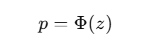

Prueba a una cola (derecha):

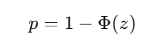

Prueba a dos colas colas:

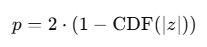

In [13]:
from scipy.stats import norm
z_critico_95 = norm.ppf(0.995)
print(f"""Valor z crítico para un 95% de nivel de confianza = ± {round(z_critico_95,2)}
      """)

z_obtenido = statistics.NormalDist(mu = 78, sigma = 7/np.sqrt(22)).zscore(82)
print(f"""Z obtenido: {round(z_obtenido,2)}
      """)

p_valor = 2 * (1-norm.cdf(abs(z_obtenido)))
print(f"p-valor: {round(p_valor,4)}")
                

Valor z crítico para un 95% de nivel de confianza = ± 2.58
      
Z obtenido: 2.68
      
p-valor: 0.0074


Sí, rechazamos la hipótesis nula u = 78

Veamos las curvas de *distribuciones muestrales* que plantean las 2 hipótesis. Como bien explica Hinton (2014), no comparamos una media muestral con la distribución de la población de la cual proviene esa media (es incorrecto eso), sino con la distribución de medias de todas las muestras posibles.

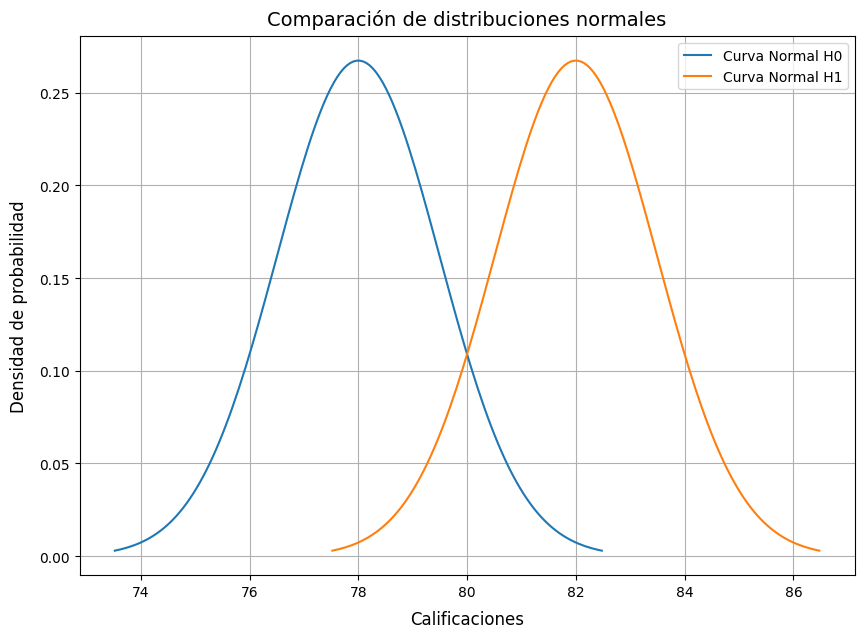

In [36]:
rango0 = np.linspace(u -3* (7/np.sqrt(22)), u+ 3* (7/np.sqrt(22)), num = 150)
"""
Como ven, no dividimos por el desvío de la población sino por 
el error estándar de la distribución muestral.
"""

curva_h0 = norm(loc = 78, scale = 7/np.sqrt(22)).pdf(rango0)
""" 
PDF es la sigla de Probability Density Function (Función
de densidad de probabilidad)
"""

rango1 = np.linspace(x -3* (7/np.sqrt(22)), x + 3* (7/np.sqrt(22)), num = 150)
curva_h1 = norm(loc = x, scale = v/np.sqrt(22)).pdf(rango1)

# Graficar la curva normal
plt.figure(figsize= (10,7))
plt.plot(rango0, curva_h0, label='Curva Normal H0')
plt.plot(rango1, curva_h1, label='Curva Normal H1')
plt.xlabel('Calificaciones', fontsize = 12, labelpad= 8 )
plt.ylabel('Densidad de probabilidad', fontsize = 12, labelpad= 8)
plt.title('Comparación de distribuciones normales', fontsize = 14, pad=8)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

El 95% central de la distribución que armamos con los datos empíricos de la muestra (aquí llamada "Curva normal H1") es el **intervalo de confianza**

## Ejercicio 6

In [58]:
u = 78
s = 7 # Desvío muestral
x= 82

t_critico_99 = t.ppf(0.995, 21)
print("t crítico al 99% de confianza: ±", round(t_critico_99, 2))
print(f"{'-'*35}")

error_estandar = 7/np.sqrt(22-1)
t_obtenido = (78 - 82)/error_estandar
print("t obtenido:", round(t_obtenido, 2))
print(f"{'-'*35}")

p_valor = 2* (1 - t.cdf(abs(t_obtenido), df = 21))
print("p_valor:", round(p_valor, 3))
print(f"{'-'*35}")

intervalo = stats.t.interval(confidence = 0.99, loc = x, scale=error_estandar,
                              df= 21 )
dic_limites = {'Límite inferior': intervalo[0],
               'Límite superior': intervalo[1]}

for nom, val in dic_limites.items():
    print(f'{nom}: {round(val,2)}')

t crítico al 99% de confianza: ± 2.83
-----------------------------------
t obtenido: -2.62
-----------------------------------
p_valor: 0.016
-----------------------------------
Límite inferior: 77.68
Límite superior: 86.32


No rechazamos H0

## Ejercicio 7

Lo que pasa es que los test t son más exigentes que las pruebas de puntuaciones z. Esto es así porque en el primer caso no conocemos la varianza poblacional, la estimamos. 

Al estimarla, reducimos el denominador, haciendo la varianza (y el desvío estándar) más grande. Consecuentemente, el error estándar es más grande y la curva t (para cada grado de libertad) es más dispersa que la curva normal z.

Así, para los test t se necesitan desvíos mayores con respecto a la media para rechazar H0 a un mismo nivel de significancia en comparación con la prueba Z

## Ejercicio 8

In [15]:
x = [105, 109, 115, 112, 124, 115, 103, 110, 125, 99]

t_critico_95_unilateral = t.ppf(0.95, len(x)-1)
test_t = stats.ttest_1samp(x, popmean = 106, alternative = 'greater')
intervalo = t.interval(confidence= 0.95, loc = np.mean(x),
                       scale = statistics.variance(x)/np.sqrt(len(x)-1),
                       df = len(x)-1)

print(f"Valor t crítico 0.05 unilateral con 9 gdl: {round(t_critico_95_unilateral,3)}")
print(test_t)
print(f'Intervalo de confianza: [{round(intervalo[0],2)}, {round(intervalo[1],2)}]')

Valor t crítico 0.05 unilateral con 9 gdl: 1.833
TtestResult(statistic=2.134001770636177, pvalue=0.03080966059022612, df=9)
Intervalo de confianza: [57.9, 165.5]


## Ejercicio 9

In [38]:
u = 28.5
sigma = 5.5
n = 100
error_estandar = sigma / np.sqrt(n)
medias = [30, 28, 29.5, 28, 29]

probabilidades = [norm(loc = u, scale = error_estandar).cdf(x) for x in medias]

print(f"a) Probabilidad <= 30: {round(probabilidades[0],4)}")
print(f"b) Probabilidad <= 28: {round(probabilidades[1],4)}")
print(f"c) Probabilidad <= 29.5: {round(1-probabilidades[2],4)}")
print(f"d) Probabilidad >= 28 & <= 29: {round(probabilidades[4] - probabilidades[3],4)}")

a) Probabilidad <= 30: 0.9968
b) Probabilidad <= 28: 0.1817
c) Probabilidad <= 29.5: 0.0345
d) Probabilidad >= 28 & <= 29: 0.6367


## Ejercicio 10

In [39]:
x = 40
n = 24
sigma = 8

intervalo = norm.interval(confidence = 0.95, loc = x, scale = sigma/np.sqrt(n))
print(f'Intervalo de confianza al 95%: {round(intervalo[0], 2)}, {round(intervalo[1], 2)}')

intervalo = norm.interval(confidence = 0.99, loc = 40, scale = sigma/np.sqrt(n))
print(f'Intervalo de confianza al 99%: {round(intervalo[0], 2)}, {round(intervalo[1], 2)}')

Intervalo de confianza al 95%: 36.8, 43.2
Intervalo de confianza al 99%: 35.79, 44.21


Con los mismos datos, un nivel de confianza mayor hace al intervalo más amplio (ver curva del Ejercicio 5). Esto hace más probabile que en el intervalo entre la media bajo H0

## Ejercicio 11

Evaluación de la significancia del coeficiente *r* de Pearson

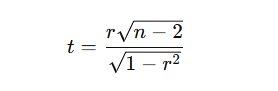

### Aclaraciones:

*¿Cuál es la fórmula para el p-valor en la distribución t?*

Se usa la función de distribución acumulativa de la curva t, que tiene en cuenta los grados de libertad.

A una cola (izquierda):

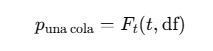

A una cola (derecha):

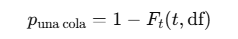

A dos colas:

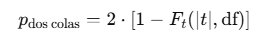

### Parte A

In [18]:
r= 0.27
n = 39


t_obtenido = (r * np.sqrt(n - 2))/np.sqrt(1- r ** 2) # Cálculo manual (no hay una función en Python exclusivamente para esto)
p_valor_a = 2 * (1 - t.cdf(abs(t_obtenido), df= n-2)) # Cálculo del p-valor

print(f'Módulo de t obtenida: {round(abs(t_obtenido),2)}')
print('p-valor obtenido:', round(p_valor_a,4))



Módulo de t obtenida: 1.71
p-valor obtenido: 0.0964


El primer coeficiente no es estadísticamente significativo. No podemos descartar la independencia estadística; con la evidencia brindada no es posible decir que los hermanos tienen mayor semejanza respecto a inteligencia que los individuos no emparentados entre sí.

### Parte B

In [19]:
r = 0.91
n = 28

t_obtenido = (r * np.sqrt(n - 2))/np.sqrt(1- r ** 2) # Cálculo manual (no hay una función en Python exclusivamente para esto)
p_valor_a = 2 * (1 - t.cdf(abs(t_obtenido), df= n-2)) # Cálculo del p-valor

print(f'Módulo de t obtenida: {round(abs(t_obtenido),2)}')
print('p-valor obtenido:', round(p_valor_a,4))

Módulo de t obtenida: 11.19
p-valor obtenido: 0.0


El segundo coefiente de correlación sí es estadísticamente significativo. Aquí rechazamos H0 (independencia estadística) y podemos asumir que existe una correlación positiva fuerte a nivel poblacional entre las inteligencias de gemenos univitelinos. 

## Ejercicio 12

In [20]:
u = 32.11
x = 29.61
s = 6
n = 26
dof = n - 1
error_estandar = s/np.sqrt(dof)

t_obtenido = (x - u) / (error_estandar)
p_valor_bilateral = 2*(1- t.cdf(abs(t_obtenido), df= dof ))
p_valor_derecho = 1- t.cdf(abs(t_obtenido), df= dof )

print('t obtenido:', round(t_obtenido, 2))
print('p-valor (prueba bilateral):', round(p_valor_bilateral, 4))
print('p-valor (prueba cola derecha):', round(p_valor_derecho, 4))

t obtenido: -2.08
p-valor (prueba bilateral): 0.0476
p-valor (prueba cola derecha): 0.0238


La afirmación es válida, hay una diferencia estadísticamente significativa entre la media poblacional y la media de los 26 estudiantes. 

## Ejercicio 13

In [21]:
intervalo = t.interval(confidence = 0.95 , df = dof, loc = x, scale = error_estandar)
print(f'Intervalo de confianza al 95% para 25 gl: [{round(intervalo[0], 2)}, {round(intervalo[1], 2)}]')

Intervalo de confianza al 95% para 25 gl: [27.14, 32.08]


## Ejercicios 14 y 15

In [22]:
u = 265
x = 268.5
n = 626
s = 50
dof = n - 1
error_estandar = s/np.sqrt(dof)

t_obtenido = (x - u)/error_estandar
p_valor = 2*(1- t.cdf(abs(t_obtenido), df= dof ))
intervalo = t.interval(confidence = 0.99 , df = dof, loc = x, scale = error_estandar)


print('t obtenido:', round(t_obtenido, 2))
print('p-valor:', round(p_valor, 4))
print(f'Intervalo de confianza al 99% para 625 gl: [{round(intervalo[0], 2)}, {round(intervalo[1], 2)}]')

t obtenido: 1.75
p-valor: 0.0806
Intervalo de confianza al 99% para 625 gl: [263.33, 273.67]


No se puede rechazar la hipótesis nula

## Ejercicio 16

*Pueden revisar el archivo de Excel* cap12_ej16.xlsx *para ver las muestras y medias que se obtienen a partir de los datos brindados por el libro.*

### Muestreo sin reposición

En el muestreo sin reposición, lo que se busca es un conjunto (en este caso de dos elementos) sin importar el orden de aparición de elementos. 

Vale decir, es lo mismo meter la mano en la bolsa y sacar el 1 primero y el 3 después, que sacar los dos números juntos.

La forma de obtener el número deseado es mediante la combinación (distinta de la permutación):

![Captura de pantalla 2025-01-20 191511.png](<attachment:Captura de pantalla 2025-01-20 191511.png>)
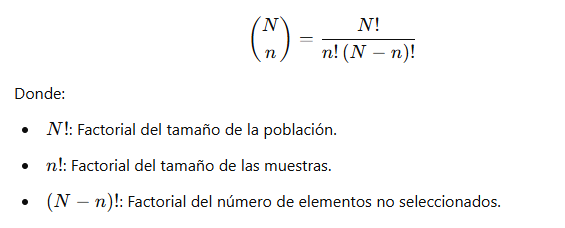

Por lo tanto, la cantidad de muestras en este caso es:

![Captura de pantalla 2025-01-20 191546.png](<attachment:Captura de pantalla 2025-01-20 191546.png>)
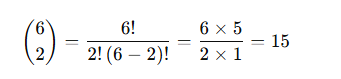

Media poblacional: 6.0
Desvío estándar poblacional: 3.42
Media muestral: 6.0
Error estándar: 2.4152294576982394
Desvío de la distribución: 2.160246899469287


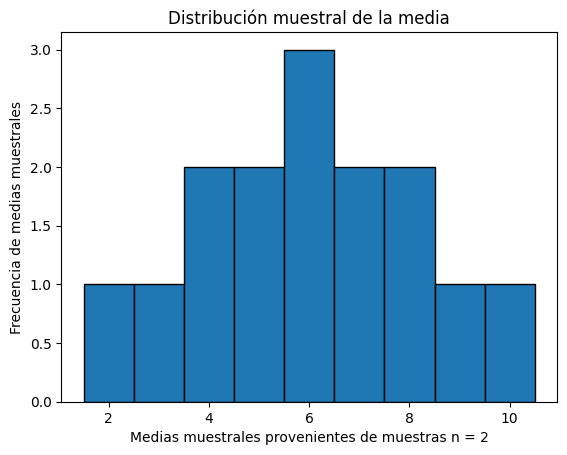

In [23]:
datos_ej16 = [1, 3, 5, 7, 9, 11]
u = np.mean(datos_ej16)
sigma = statistics.pstdev(datos_ej16)
print('Media poblacional:', u)
print('Desvío estándar poblacional:', round(sigma,2))

distribucion_muestral = [2, 3, 4, 5, 6, 4, 5, 6, 7, 6, 7, 8, 8, 9, 10]
x = np.mean(distribucion_muestral)
print('Media muestral:', x)

error_estandar = sigma/np.sqrt(2)
print('Error estándar:', error_estandar)

desvio_distribucion = statistics.pstdev(distribucion_muestral)
print('Desvío de la distribución:', desvio_distribucion)

plt.bar(x = pd.Series(distribucion_muestral).value_counts().sort_index().index, height = pd.Series(distribucion_muestral).value_counts().sort_index().values, width = 1, edgecolor = 'black')
plt.title('Distribución muestral de la media')
plt.xlabel('Medias muestrales provenientes de muestras n = 2')
plt.ylabel('Frecuencia de medias muestrales')
plt.show()

### Muestreo con reposición

Acá el orden sí importa, debido a que yo debo forzosamente reubicar el elemento extraído nuevamente en la "tómbola" después de la primera extracción (o de cada extracción en una muestra con n>2).

De esta forma, distintos órdenes de aparición dan lugar a distintas muestras.

La fórmula para calcular la cantidad de muestras posibles es:

![Captura de pantalla 2025-01-20 191143.png](<attachment:Captura de pantalla 2025-01-20 191143.png>)



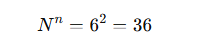

Media poblacional: 6.0
Media muestral: 6.0
Error estándar: 2.4152294576982394
Varianza de la distribución: 2.41522945769824


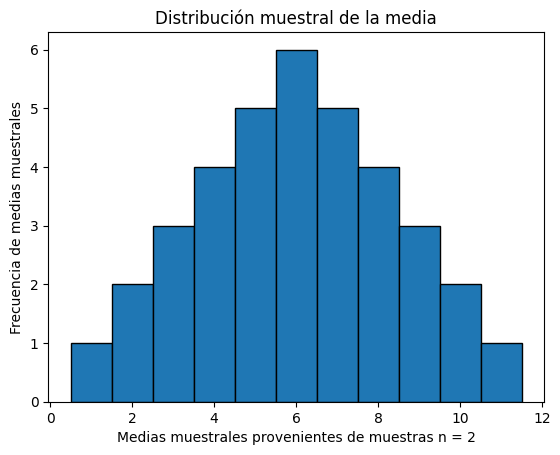

In [24]:
datos_ej16 = [1, 3, 5, 7, 9, 11]
u = np.mean(datos_ej16)
sigma = statistics.pstdev(datos_ej16)
print('Media poblacional:', u)

distribucion_muestral = [1, 2, 3, 4, 5, 6,
                         2, 3, 4, 5, 6, 7,
                         3, 4, 5, 6, 7, 8,
                         4, 5, 6, 7, 8, 9,
                         5, 6, 7, 8, 9, 10,
                         6, 7, 8, 9, 10, 11]

x = np.mean(distribucion_muestral)
print('Media muestral:', x)

error_estandar = sigma/np.sqrt(2)
print('Error estándar:', error_estandar)

desvio_distribucion = statistics.pstdev(distribucion_muestral)
print('Varianza de la distribución:', desvio_distribucion)

plt.bar(x = pd.Series(distribucion_muestral).value_counts().sort_index().index, height = pd.Series(distribucion_muestral).value_counts().sort_index().values, width = 1, edgecolor = 'black')
plt.title('Distribución muestral de la media')
plt.xlabel('Medias muestrales provenientes de muestras n = 2')
plt.ylabel('Frecuencia de medias muestrales')
plt.show()

## Ejercicio 17

In [25]:
distribucion_muestral = [2, 3, 4, 5, 6, 4, 5, 6, 7, 6, 7, 8, 8, 9, 10]

distribucion_frecuencias = pd.Series(distribucion_muestral).value_counts().sort_index()
df = pd.DataFrame({'Media' : distribucion_frecuencias.index,
              'Frecuencia': distribucion_frecuencias.values})
print(sum(df['Frecuencia']))
df

15


,Media,Frecuencia
0,2,1
1,3,1
2,4,2
3,5,2
4,6,3
5,7,2
6,8,2
7,9,1
8,10,1


Respuestas:

a- 1/15 = 0.067

b- 1/15 = 0.067

c- 8/15 = 0.533

d- 0

¿Por qué la respuesta del inciso *c)* es 8/15? Porque la consigna dice tan "**desviada** como..." y eso puede ser hacie un lado o hacia el otro de la media.

## Ejercicio 18

In [26]:
distribucion_muestral = [1, 2, 3, 4, 5, 6,
                         2, 3, 4, 5, 6, 7,
                         3, 4, 5, 6, 7, 8,
                         4, 5, 6, 7, 8, 9,
                         5, 6, 7, 8, 9, 10,
                         6, 7, 8, 9, 10, 11]

distribucion_frecuencias = pd.Series(distribucion_muestral).value_counts().sort_index()
df = pd.DataFrame({'Media' : distribucion_frecuencias.index,
              'Frecuencia': distribucion_frecuencias.values})
print(sum(df['Frecuencia']))
df

36


,Media,Frecuencia
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,5
7,8,4
8,9,3
9,10,2


Respuestas:

a- 3/36 = 1/12 = 0.083

b- 3/36 = 1/12 = 0.083

c- 20/36 = 5/9 = 0.555

d- 1/36 = 0.028

Comparemos los resultados de los Ejercicios 17 y 18. Como verán, los valores extremos son más probables en la distribución de muestreo con reposición, debido a que son posibles más muestras. 

## Ejercicio 19

In [27]:
u = 1.83
datos_ej19 = [1.25, 2.5, 1.75, 2.25, 3.25, 3.00, 2.00, 2.00]

test_t = stats.ttest_1samp(datos_ej19, popmean = u)
test_t


TtestResult(statistic=1.8146073955542006, pvalue=0.112453431154067, df=7)

La hipótesis nula no puede ser rechazada. No podemos descartar que las acciones se hayan escogido al azar de la población de acciones durante el período especificado. 

## Ejercicio 20

In [28]:
u = 12.63
datos_ej20 = [15, 12, 13, 16, 17, 11, 14, 15, 13, 14]

test_t = stats.ttest_1samp(datos_ej20, popmean = u, alternative= 'two-sided')
test_t

TtestResult(statistic=2.3729096063693604, pvalue=0.04170959836059713, df=9)

*Aclaración: Es más preciso el cálculo hecho aquí que la resputesta del libro. Esto se debe a que el libro presenta las respuestas de un cálculo manual en que cada resultado parcial se redondea, algo que, obviamente, Python no hace*.

## Ejercicio 21

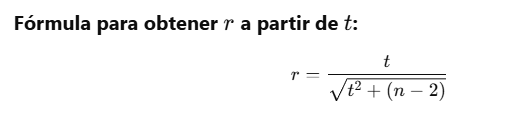

In [41]:
n = 17
r = 0.438

t_obtenido = r*np.sqrt(n-2)/(np.sqrt(1-r**2)) # Esto se hace con la fórmula del ejercicio 11 

t_critico_95_unilateral = t.ppf(0.95, df = n-2)
t_critico_95_bilateral = t.ppf(0.975, df= n-2)

"""
A partir de la fórmula para calcular r a partir de t, podemos obtener
el r crítico; es decir, el valor de r que es necesario para alcanzar
los t críticos a cada tipo de prueba, datos que ya conocemos.
"""

r_critico_95_unilateral = t_critico_95_unilateral/ np.sqrt(t_critico_95_unilateral**2 + (n-2))
r_critico_95_bilateral = t_critico_95_bilateral/ np.sqrt(t_critico_95_bilateral**2 + (n-2))

p_valor_bilateral = 2 * (1 - t.cdf(abs(t_obtenido), df= n- 2))
p_valor_derecho = 1 - t.cdf(abs(t_obtenido), df= n- 2)

print('t obtenido:', round(t_obtenido, 2))
print('t crítico 95% unilateral:', round(t_critico_95_unilateral, 4) )
print('t crítico 95% bilateral: ±', round(t_critico_95_bilateral, 4) )
print('-' * 37)

print('r obtenido:', r)
print('r crítico unilateral al 95%:', round(r_critico_95_unilateral,4))
print('r crítico bilateral al 95%: ±', round(r_critico_95_bilateral,4))
print('-' * 37)

print('p-valor (prueba bilateral):', round(p_valor_bilateral, 4))
print('p-valor (prueba cola derecha):', round(p_valor_derecho, 4))

t obtenido: 1.89
t crítico 95% unilateral: 1.7531
t crítico 95% bilateral: ± 2.1314
-------------------------------------
r obtenido: 0.438
r crítico unilateral al 95%: 0.4124
r crítico bilateral al 95%: ± 0.4821
-------------------------------------
p-valor (prueba bilateral): 0.0787
p-valor (prueba cola derecha): 0.0393


Si la hipótesis alternativa es direccional, entonces podemos rechazar H0. Para una prueba bilateral, H0 se sostiene.

## Ejercicio 22

In [30]:
r = -0.397
n = 25

t_obtenido = (r*np.sqrt(n-2))/np.sqrt(1-r**2)
p_valor = 2 * (1 - t.cdf(abs(t_obtenido), df= n- 2))

t_critico_95_bilateral = t.ppf(0.975, df= n-2)
r_critico_95_bilateral = t_critico_95_bilateral/ np.sqrt(t_critico_95_bilateral**2 + (n-2))


print(f"t obtenido: {round(t_obtenido, 3)}")
print(f"t crítico: ±{round(t_critico_95_bilateral, 3)}")
print(f"r crítico: ±{round(r_critico_95_bilateral, 3)}")
print(f"p_valor: {round(p_valor, 3)}")

t obtenido: -2.074
t crítico: ±2.069
r crítico: ±0.396
p_valor: 0.049


Esto está muy cerca del límite para la tolerancia del error tipo I. Incluso, dependiendo del redondeo, podemos aceptar H0 en la creencia que el r crítico es 0.4, <u>*como es el caso del libro*</u> , en cuya respuesta se acepta H0 por esa razón.

## Ejercicios 24 a 29

Estos ejercicios son teóricos, pueden averiguar sus respuestas en el libro. Solo como comentario, la respuesta al Ejercicio 26 está conectada a la respuesta al Ejercicio 2 (también teórica y ausente en este cuaderno) y la respuesta al Ejercicio 28 puede ser dada usando la resolución del Ejercicio 10.

## Ejercicio 30

In [63]:
datos_ej30 = pd.read_csv("datos_ej30_cap12.csv", header = None)
datos_ej30

,0,1,2,3,4,5,6,7,8,9,10
0,3,4,5,5,6,6,6,7,7,8,9
1,2,3,4,4,5,5,5,6,6,7,8
2,1,2,3,3,4,4,4,5,5,6,7
3,1,2,3,3,4,4,4,5,5,6,7
4,0,1,2,2,3,3,3,4,4,5,6
5,0,1,2,2,3,3,3,4,4,5,6
6,0,1,2,2,3,3,3,4,4,5,6
7,-1,0,1,1,2,2,2,3,3,4,5
8,-1,0,1,1,2,2,2,3,3,4,5
9,-2,-1,0,0,1,1,1,2,2,3,4


Una aclaración importante. 

Acá se ve que hay 121 resultados posibles. Cada población tiene 11 elementos: 11**2 =  121.

Pero, ¿por qué esta disposición? Cuidado, porque este caso no es lo mismo que vimos del muestreo con y sin reposición. En aquel caso, todos los elementos estaban en la **misma bolsa**, **acá no**: si lo estuvieran, se podrían sacar 2 elementos de una misma población, lo cual es incorrecto. 

A efectos de la combinatoria, es como si tuviéramos una sola bolsa de 11 elementos en muestreo con reposición: al sacar de una bolsa hay 11 posibilidades; al sacar de la otra bolsa, también.

Por último, a los dos elementos extraídos se les hace una operación (resta la segunda extracción a la primera, en ese orden) y eso es lo que se anota.

### Parte A

In [71]:
distribucion_frecuencia30 = pd.DataFrame()

todos_datos_juntos = list(datos_ej30[0]) + list(datos_ej30[1]) + list(datos_ej30[2]) + list(datos_ej30[3]) + list(datos_ej30[4]) + list(datos_ej30[5]) + list(datos_ej30[6]) + list(datos_ej30[7]) + list(datos_ej30[8]) + list(datos_ej30[9]) + list(datos_ej30[10])
frecuencias = pd.Series(todos_datos_juntos).value_counts().sort_index()

distribucion_frecuencia30['Diferencia de medias'] = frecuencias.index
distribucion_frecuencia30['Frecuencia'] = frecuencias.values
distribucion_frecuencia30['Probabilidad'] = round(distribucion_frecuencia30['Frecuencia']/distribucion_frecuencia30['Frecuencia'].sum(), 4)
distribucion_frecuencia30

,Diferencia de medias,Frecuencia,Probabilidad
0,-3,1,0.0083
1,-2,2,0.0165
2,-1,5,0.0413
3,0,10,0.0826
4,1,14,0.1157
5,2,18,0.1488
6,3,21,0.1736
7,4,18,0.1488
8,5,14,0.1157
9,6,10,0.0826


### Parte B

In [72]:
media_diferencias = np.mean(todos_datos_juntos)
diferencia_medias = 6 - 3

print('Media de las diferencias:', media_diferencias)
print('Diferencia de medias:', diferencia_medias)

Media de las diferencias: 3.0
Diferencia de medias: 3


La media de las diferencias es igual a la diferencia de medias

## Ejercicio 35

In [82]:
datos_ej35 = [55, 50, 45, 75, 80, 75, 80, 80, 85, 60, 50, 65, 60, 50, 80, 50]

test_t = stats.ttest_1samp(datos_ej35, popmean = 50)
test_t

TtestResult(statistic=4.278444196873755, pvalue=0.0006598153106224585, df=15)

Rechazamos la hipótesis nula

## Ejercicio 37

In [84]:
datos_ej37 = np.array([100, 120, 130, 120, 125, 90, 130, 135, 140, 110]) * 1000

test_t = stats.ttest_1samp(datos_ej37, popmean = 100000)
test_t

TtestResult(statistic=4.0, pvalue=0.0031104283103858535, df=9)

Sí, adoptaría el curso. Hay una diferencia estadísticamente significativa entre la media conocida y la media muestral de los agentes que hicieron el curso.

## Ejercicio 38

In [103]:
r_casados_atractivo = 0.59
r_casados_generosidad = 0.23
n_casados = 53

r_divorciados_atractivo = 0.07
r_divorciados_generosidad = 0.13
n_divorciados = 24

t_obtenido_rca = round((r_casados_atractivo * np.sqrt(n_casados-2))/np.sqrt((1-r_casados_atractivo**2)), 2)
t_obtenido_rcg = round((r_casados_generosidad* np.sqrt(n_casados-2))/np.sqrt((1-r_casados_generosidad**2)), 2)
t_obtenido_rda = round((r_divorciados_atractivo*np.sqrt(n_divorciados-2))/np.sqrt((1-r_divorciados_atractivo**2)), 2)
t_obtenido_rdg = round((r_divorciados_generosidad * np.sqrt(n_divorciados-2))/np.sqrt((1-r_divorciados_generosidad**2)), 2)


p_valor1 = round(2 * (1 - t.cdf(abs(t_obtenido_rca), df = n_casados - 2)), 4)
p_valor2 = round(2 * (1 - t.cdf(abs(t_obtenido_rcg), df = n_casados - 2)), 4)
p_valor3 = round(2 * (1 - t.cdf(abs(t_obtenido_rda), df = n_divorciados - 2)), 4)
p_valor4 = round(2 * (1 - t.cdf(abs(t_obtenido_rdg), df = n_divorciados - 2)), 4)

dic_t = {'Atractivo casados': t_obtenido_rca, 'Generosidad casados' : t_obtenido_rcg, 'Atractivo divorciados':t_obtenido_rda, 'Generosidad divorciados':t_obtenido_rdg}
dic_p = {'Atractivo casados': p_valor1, 'Generosidad casados' : p_valor2, 'Atractivo divorciados':p_valor3, 'Generosidad divorciados':p_valor4}


### Estadísticos t

In [104]:
dic_t

{'Atractivo casados': 5.22,
 'Generosidad casados': 1.69,
 'Atractivo divorciados': 0.33,
 'Generosidad divorciados': 0.61}

### p-valores

In [105]:
dic_p

{'Atractivo casados': 0.0,
 'Generosidad casados': 0.0971,
 'Atractivo divorciados': 0.7445,
 'Generosidad divorciados': 0.5481}